In [2]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
url_icg = 'https://www.economia.gob.ar/download/infoeco/publicaciones/DatosAbiertos/370.1.csv'
icg = pd.read_csv(url_icg)
#rent_fin = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/333/distribution/333.1/download/datos-rentabilidad-sistema-financiero.csv')
icg["indice_tiempo"] = icg["indice_tiempo"].astype("datetime64[ns]")
icg.set_index("indice_tiempo", inplace = True)
icg.tail()

,icg,evaluacion_general,interes_general,eficiencia,honestidad,capacidad
indice_tiempo,,,,,,
2016-08-01,2.52,2.10,2.07,2.21,3.18,3.05
2016-09-01,2.53,2.12,2.06,2.20,3.22,3.05
2016-10-01,2.63,2.28,2.28,2.29,3.23,3.08
2016-11-01,2.52,2.17,2.03,2.12,3.19,3.07
2016-12-01,2.49,2.02,2.08,2.10,3.23,3.03


In [11]:
storage_options = {'User-Agent': 'Mozilla/5.0'}

nombre = ['indice_tiempo', 'icc_capital','variacion_mensual', 'icc_interior', 'varicion_int', 'icc_gba', 'variacion_gba', 'icc_nacional', 'variacion_nacional']

url_icc = 'https://www.utdt.edu/download.php?fname=_171153423301721900.xls' 
icc = pd.read_excel(url_icc, storage_options= storage_options, skiprows=[0,1],names = nombre)
icc.replace({'indice_tiempo':{'Dic-07': '2017-12-01 00:00:00','mar.-24':'2024-03-01 00:00:00','Ene-08':'2008-01-01 00:00:00'
                               ,'abr.-22':'2022-04-01 00:00:00'}},inplace= True)
icc.tail()


,indice_tiempo,icc_capital,variacion_mensual,icc_interior,varicion_int,icc_gba,variacion_gba,icc_nacional,variacion_nacional
304,2023-11-01 00:00:00,46.771378,0.059907,46.712688,0.045376,48.184818,0.055477,47.507378,0.053097
305,2023-12-01 00:00:00,40.441177,-0.135343,42.236328,-0.095827,38.225254,-0.206695,39.808849,-0.162049
306,2024-01-01 00:00:00,32.741116,-0.190402,40.277779,-0.046371,33.759956,-0.116815,35.597561,-0.105788
307,2024-02-01 00:00:00,33.758503,0.031074,43.058285,0.069033,32.685814,-0.031817,36.039585,0.012417
308,2024-03-01 00:00:00,36.431065,0.079167,41.777569,-0.029744,33.825233,0.034860,36.680523,0.017784


In [12]:
icc["indice_tiempo"] = icc["indice_tiempo"].astype("datetime64[ns]")
icc.set_index("indice_tiempo", inplace = True)

In [14]:
# Recorte temporal.

icc = icc[(icc.index > '2003-02-01') & (icc.index <= '2016-12-31')] 

<Axes: title={'center': 'Comparación entre ICC e ICG'}, xlabel='indice_tiempo'>

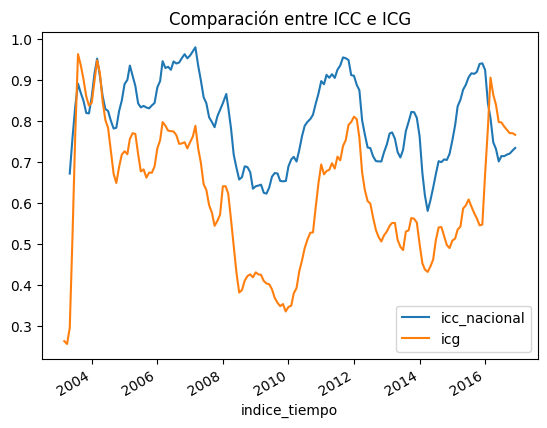

In [15]:
ax = plt.gca()

(icc.icc_nacional / icc.icc_nacional.max()).rolling(3).mean().plot(ax=ax,title= "Comparación entre ICC e ICG", legend = True)

(icg.icg / icg.icg.max()).rolling(3).mean().plot(ax=ax, legend = True)